# MATH 210 Introduction to Mathematical Computing

## March 16, 2016

Today's Agenda:

1. NumyPy Matrix Datatype
2. More Linear Algebra Examples:
    * Markov Chains
    * Least Squares Linear Regression
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

## 1. NumPy Matrices

**The NumPy matrix datatype behaves differently than the NumPy array datatype** and so we have to be careful when using both arrays and matrices. It's a good idea to stick with arrays when plotting functions, but it's more convenient to use the matrix datatype when solving matrix equations and doing general linear algebra stuff.

To create a matrix, use the function `np.matrix`.

In [2]:
A = np.matrix([ [1,2], [3,4] ])
print(A)

[[1 2]
 [3 4]]


In [3]:
type(A)

numpy.matrixlib.defmatrix.matrix

The main advantages are that matrix operations (ie. multiplatication, transpose, inverse and matrix powers) are easier to use.

In [4]:
A * A

matrix([[ 7, 10],
        [15, 22]])

In [5]:
A.T

matrix([[1, 3],
        [2, 4]])

In [6]:
A ** (-1)

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [7]:
A * A**(-1)

matrix([[  1.00000000e+00,   0.00000000e+00],
        [  8.88178420e-16,   1.00000000e+00]])

In [8]:
A ** 2

matrix([[ 7, 10],
        [15, 22]])

**Remeber that array operations are elementwise** and so we note the differences:

In [9]:
A_as_array = np.array(A)
print(A_as_array)

[[1 2]
 [3 4]]


In [10]:
type(A_as_array)

numpy.ndarray

In [11]:
A_as_array ** 2

array([[ 1,  4],
       [ 9, 16]])

In [12]:
A_as_array * A_as_array

array([[ 1,  4],
       [ 9, 16]])

All the `scipy.linalg` functions work with matrices **but we have to be careful since the output is usually a NumPy array** even if the input is a matrix. **Remember we can always use the function `type` to determine whether something is a NumPy array or a NumPy matrix.**

In [13]:
eigvals, eigvecs = la.eig(A)

In [14]:
print(eigvals)

[-0.37228132+0.j  5.37228132+0.j]


In [15]:
type(eigvals)

numpy.ndarray

In [16]:
print(eigvecs)

[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [17]:
type(eigvecs)

numpy.ndarray

In [18]:
la.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## 2. More Linear Algebra Examples

### Least Squares Linear Regression

**Theorem.** Let $(x_1,y_1), \dots , (x_n,y_n)$ be a collection of data such that at least two of $x_1, \dots , x_n$ are distinct. Let

$$
Y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}
\ \
M = \begin{bmatrix} 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}
$$

The least squares approximating line is $y = a_0 + a_1 x$ where $A = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}$ and is given by

$$
A = (M^T M)^{-1} M^T Y
$$

The least squares approximation minimizes $|| MA - Y ||^2$.

Let's do an example with some fake test data. Choose some parameters $N$, $a$, $b$ and `noise_scale`. Create an array of size $N$ of $x$ values chosen uniformly from the interval $[0,1]$, and let's create an array of $y$ values using the formula $y = a + b x + \epsilon$ where $\epsilon$ is sampled from the standard normal distribution (scaled by `noise_scale`).

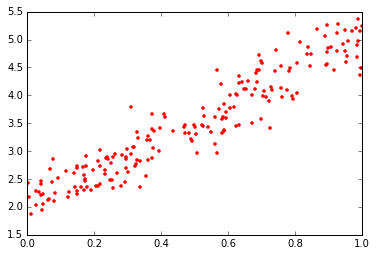

In [19]:
N = 200
a = 2
b = 3
noise_scale = 0.3
x = np.random.random(N)
y = a + b*x + np.random.randn(N)*noise_scale
plt.plot(x,y,'r.')
plt.show()

Let's find the least squares approximation. Build the matrices $Y$ and $M$. **Note that we're using NumPy arrays x and y to do the plotting and NumPy matrices M, Y and A to do the calculation.**

In [20]:
Y = np.matrix(y).T
M = np.matrix([np.ones(200),x]).T
print("Shape of Y is:",np.shape(Y))
print("Shape of M is:",np.shape(M))

Shape of Y is: (200, 1)
Shape of M is: (200, 2)


Let's compute $A = (M^T M)^{-1} M^T Y$:

In [21]:
A = (M.T * M) ** (-1) * M.T * Y
print(A)

[[ 2.01465062]
 [ 3.01672319]]


In [22]:
A

matrix([[ 2.01465062],
        [ 3.01672319]])

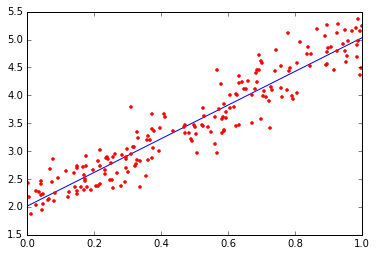

In [23]:
x_new = np.linspace(0,1,20)
y_new = A[0,0] + A[1,0] * x_new
plt.plot(x_new,y_new,x,y,'r.')
plt.show()

### Markov Chains

The transition matrix

$$
P = [p_{i,j}]
$$

of a Markov chain is given by the probabilities: $p_{i,j}$ = the probability of moving to state $i$ from state $j$. It is an $m \times m$ given $m$ states.

The probability vector after $n$ steps given $m$ states is

$$
\mathbf{x}_n = \begin{bmatrix} x_{n,1} \\ \vdots \\ x_{n,m} \end{bmatrix}
$$

where $x_{n,i}$ = the probability of being in state $i$ after $n$ steps. We calculate $\mathbf{x}_n$ by

$$
\mathbf{x}_n = P^n \mathbf{x}_0
$$

where $\mathbf{x}_0$ is the initial probability vector.

Consider the following example. A walker moves every minute between three states 1, 2 and 3 (arranged counterclockwise). At each state, the walker either stays where they are or walks to the next state in the counterclockwise direction (from 1 to 2, from 2 to 3, from 3 to 1). The walker stays with probability 2/3 and walks counterclockwise with probabilty 1/3. The transition matrix in this case is

$$
P = \begin{bmatrix} 2/3 & 0 & 1/3 \\ 1/3 & 2/3 & 0 \\ 0 & 1/3 & 2/3 \end{bmatrix}
$$

(a) If the walker begins at state 1, what is the probability they will be at state 3 after three minutes?

(b) What fraction of the time is the walker at each position as $n \to \infty$?

In [24]:
P = np.matrix( [ [2/3,0,1/3],[1/3,2/3,0],[0,1/3,2/3] ] )
print(P)

[[ 0.66666667  0.          0.33333333]
 [ 0.33333333  0.66666667  0.        ]
 [ 0.          0.33333333  0.66666667]]


In [25]:
x0 = np.matrix( [1,0,0]).T
print(x0)

[[1]
 [0]
 [0]]


In [26]:
x3 = P ** 3 * x0
print(x3)

[[ 0.33333333]
 [ 0.44444444]
 [ 0.22222222]]


In [27]:
x3[2,0]

0.22222222222222221

There is a 22.2\% chance the walker is at state 3 after three minutes.

In [28]:
P ** 100

matrix([[ 0.33333333,  0.33333333,  0.33333333],
        [ 0.33333333,  0.33333333,  0.33333333],
        [ 0.33333333,  0.33333333,  0.33333333]])

Therefore we can see that the walker is at each state an equal amount of time as $n \to \infty$.

## 3. Exercises

**Exercise.** Least square quadratic regression works in a similar way as linear regression. Let $(x_1,y_1), \dots , (x_n,y_n)$ be a collection of data such that at least two of $x_1, \dots , x_n$ are distinct. Let

$$
Y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix}
\ \
M = \begin{bmatrix} 1 & x_1 & x_1^2 \\ & \vdots & \\ 1 & x_n & x_n^2 \end{bmatrix}
$$

The least squares approximating qudratic polynomial is $y = a_0 + a_1 x + a_2 x^2$ where $A = \begin{bmatrix} a_0 \\ a_1 \\ a_2 \end{bmatrix}$ and is given by

$$
A = (M^T M)^{-1} M^T Y
$$

The least squares approximation minimizes $|| MA - Y ||^2$.

Choose some parameters $N$, $a$, $b$, $c$ and `noise_scale`. Create an array of size $N$ of $x$ values chosen uniformly from the interval $[0,1]$, and create an array of $y$ values using the formula $y = a + b x + cx^2 + \epsilon$ where $\epsilon$ is sampled from the standard normal distribution (scaled by `noise_scale`). Compute the least squares quadratic regression to recover the parameters $a$, $b$ and $c$.

**Exercise.** Consider the following Markov chain (from [quant-econ.net](http://quant-econ.net/py/finite_markov.html)) which models the wealth of a ficticious set of households: 

![quant](http://quant-econ.net/_images/graphviz-dfd0a02ebca6beddb515ccd15bd85ffa3bd2d866.png)

The probabilities describe the yearly transition of a given household between three different income levels: 1 = rich, 2 = middle class, 3 = poor.

(a) Find the transition matrix $P$.

(b) Suppose a given household is classified as poor. What is the probability that the household is classified as rich after 5 years?

(c) Calculate $P^n$ for large values of $n$ to approximate the limit $\lim_{n \to \infty} P^n$. Use this approximation to calculate the probability that any household will be eventually be poor. Does your result make sense?